In [2]:
import matplotlib;
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import numpy as np

# Part 1

#### 1. Create an array with 100 elements from 1 to 100 in order: Create a box plot to visualize your data.

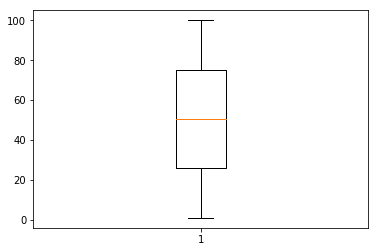

In [3]:
# fake up some data

nums = np.arange(1,101)
plt.boxplot(nums)

plt.show()


#### 2. Create an array with 10,000 random numbers. Create a histogram of the data using 20 bins.

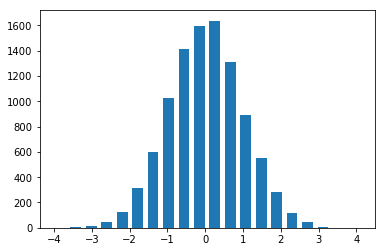

In [4]:
x =  np.random.randn(10000)
hist, bins = np.histogram(x, bins=20)
width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2

plt.bar(center, hist, width=width)
plt.show()

#### 3. Write a program to generate 100 random number uniformly distributed between 1 and 100. Write the numbers out to a binary file and use a line graph to draw the 100 numbers.

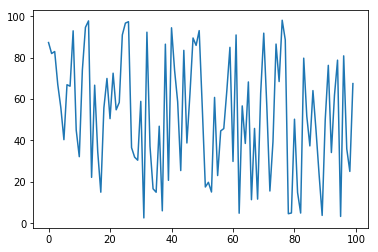

In [5]:
array = np.random.uniform(low=1,high=100,size=100)
array.tofile('uniformDistNums.bin')

plt.plot(array)
plt.show()

#### 4 Write a program to read the binary file back, divide the range between 1 and 100 into 7 intervals, and calculate the frequency for each interval: display a histogram of your result.

In [6]:
def histo(x, bins = 'auto'):
    hist, bins = np.histogram(x, bins=bins)
    width = 0.9*(bins[1] - bins[0])
    center = (bins[:-1] + bins[1:]) / 2

    plt.bar(center, hist, width=width)
    plt.show()

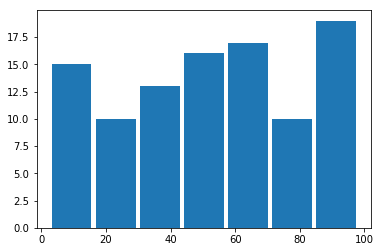

In [7]:
readarray = np.fromfile('uniformDistNums.bin')

histo(readarray, 7)
# hist, bins = np.histogram(x, bins=7)
# width = 0.9*(bins[1] - bins[0])
# center = (bins[:-1] + bins[1:]) / 2

# plt.bar(center, hist, width=width)
# plt.show()

# Part 2

## Problem 1
#### Download the NOAA Land Ocean Temperature Anomalies Data Set: https://www.ncdc.noaa.gov/cag/time-series/global/globe/land_ocean/1/6/1880-2017.csv. Create a histogram of the data. Include a label called “Year” along the x-axis and a label called Degrees F +/- From Average along the y-axis. Describe trends in the data.

In [8]:
import pandas as pd


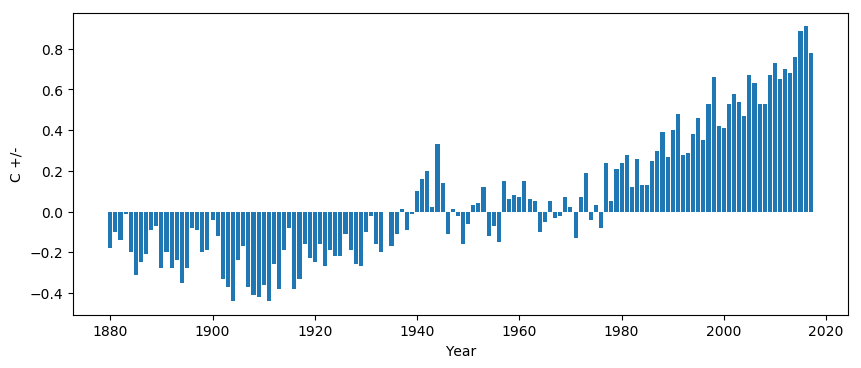

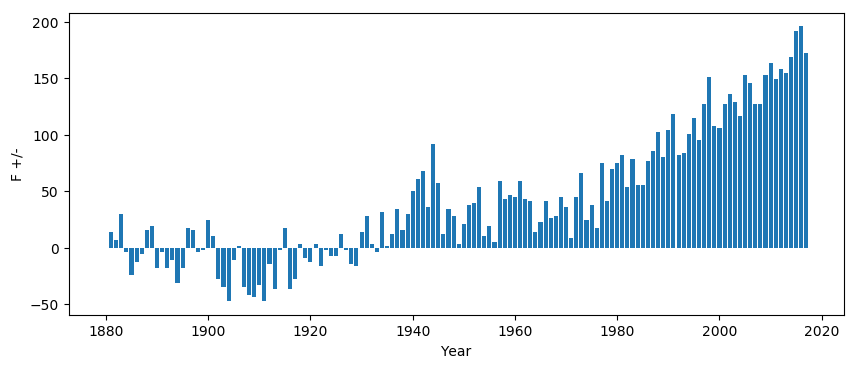

In [82]:
data = pd.read_csv('data/noaa-data.csv')

# data['Value'].hist()#
fig = plt.figure(figsize=(10, 4), dpi=100)
data['Value'] = pd.to_numeric(data['Value'])
plt.bar(data['Year'], data['Value'])

plt.xlabel('Year')
plt.ylabel('C +/-')

plt.show()
fig = plt.figure(figsize=(10, 4), dpi=100)

data['Value'] = (data['Value']*100)
data['Value'] = ((data['Value'] * 1.8) + 32);
          
plt.bar(data['Year'], data['Value'])

plt.xlabel('Year')
plt.ylabel('F +/-')

plt.show()

The temperature changes from 1880 to about 1940 have not been much different the fluctuate, but nothing major. However right around 1940 to 2017 has an almost exponetial temperature increase.

## Problem 2

#### Download the member of Congress by Age data set: https://raw.githubusercontent.com/fivethirtyeight/data/master/congress-age/congressterms.csv. Create a Star Plot of the data and create a Parallel Coordinates Plot of the data. Describe the trends in the data.

Code for star plot obtained from:
[https://stackoverflow.com/questions/42227409/tutorial-for-python-radar-chart-plot](https://stackoverflow.com/questions/42227409/tutorial-for-python-radar-chart-plot)

In [234]:
data = pd.read_csv('data/congress-terms.csv')

b = {}
party = {}
for d in data.iterrows():
    date = d[1]['termstart']
    p = d[1]['party']
    if date not in b:
        b[date] = 0
    if p not in party:
        party[p] = 0
    b[date] += 1    
    party[p] += 1
party

p = {}
for d in data.iterrows():
    d = d[1]
    party = d['party']
    if party not in p:
        p[party] = [0,0]
    p[party][0] += d['age']
    p[party][1] += 1
    
# Compute average age    
avg_age = {}
for k, val in p.items():
    avg[k] = val[0] / val[1]
print(avg)

incumbent = {}
for d in data.iterrows():
    d = d[1]
    party = d['party']
    if party not in incumbent:
        incumbent[party] = {'Yes':0, 'No':0}
    incumbent[party][d['incumbent']] += 1


{'D': 53.43146744412014, 'R': 53.1670413343002, 'AL': 42.300000000000004, 'L': 34.4, 'I': 54.06031746031749, 'ID': 55.1}


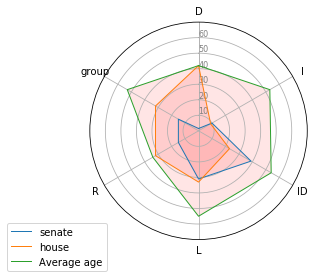

In [235]:
group = ['senate','house','Average age']
df = pd.DataFrame({
'group': group,
'AL': [ 1.5, 42, 42],
'D': [ 10, 9, 53],
'I': [ 39, 23, 54],
'ID': [ 31, 33, 55],
'L': [ 15, 32, 34],
'R': [ 15, 32, 53],
})
 
# ------- PART 1: Create background
 
# number of variable
categories=list(df)[1:]
N = len(categories)

 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
# angles = [n / float(N) * 2 * pi for n in range(N)]
# angles += angles[:1]

 
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# # If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# # Draw one axe per variable + add labels labels yet
plt.xticks(angles, categories)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([10,20,30,40,50,60], ["10","20","30","40","50","60"], color="grey", size=8)
plt.ylim(0,70)
 
# ------- PART 2: Add plots
for i in range(0, 3):
    values=df.loc[i].drop('group').values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=1, linestyle='solid', label=group[i])
    ax.fill(angles, values, 'r', alpha=0.1)


# # Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

plt.show()

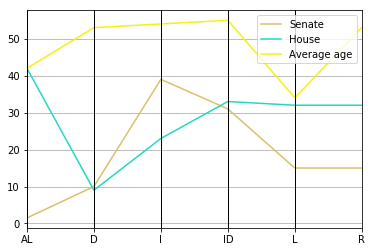

In [236]:
from pandas.plotting import parallel_coordinates

group = ['Senate','House','Average age']

df = pd.DataFrame({
'group' : group,
'AL': [ 1.5, 42, 42],
'D': [ 10, 9, 53],
'I': [ 39, 23, 54],
'ID': [ 31, 33, 55],
'L': [ 15, 32, 34],
'R': [ 15, 32, 53],
})

parallel_coordinates(df, 'group')
plt.show()

One clear trend we can spot in these visualizations is that parties with a smaller average age tend to have less members of Senate, and parties with a larger average age tend to have a greater amount of members of seante.

## Problem 3
Download the U.S. Birth data set:
https://raw.githubusercontent.com/fivethirtyeight/data/master/births/US_births_2000-
2014_SSA.csv. What day of the month had the highest number of births? What day of
the month had the lowest number of births? Are there any interesting trends in the data,
i.e. more births in Summer or Winter? What about births on Friday the 13th?

In [13]:
data = pd.read_csv('data/US_births_2000-2014_SSA.csv')

data = data[data['day_of_week'] == 5.00]
data = data.groupby(['date_of_month', 'day_of_week'])['births'].agg('sum')
dt = data


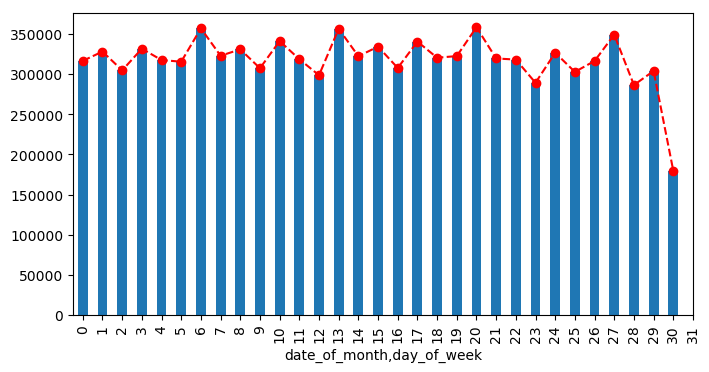

In [14]:
fig = plt.figure(figsize=(8, 4), dpi=100)
xi = [i for i in range(0, 32)]
dt.plot(marker='o', linestyle='--', color='r', label='Square') 
dt.plot(kind='bar', legend=False)
plt.xticks(xi, xi)

plt.show()

## Problem 4 
The U.S. Government maintains a sever with many interesting datasets called Data.Gov: https://www.data.gov/. Choose 3 different data sets to visualize. Visualize the data sets in at least 3 different ways. Describe the trends in the data.

In [ ]:
data = pd.read_csv('data/2010_Census_Populations_by_Zip_Code.csv')

dt = data[['Total Males', 'Total Females']].head(50)
x = [i for i in range(0, len(dt1))]
xi = data['Zip Code']

# dt1.plot(kind='bar', legend=False)

# dt1.plot.bar()
# fig.set_figheight(10)
# fig.set_figwidth(12)

# plt.show()
# dt.plot(kind='bar', legend=False)
plt.figure(figsize=(20, 4), dpi=100)

xi = [i for i in range(0, len(dt))]
# plt.bar(xi, dt['Total Males'])
# dt.plot()
plt.bar(xi, dt['Total Females'])

plt.xticks(xi, xi)

# dt.plot(marker='o', linestyle='--', color='r', label='Square') 
plt.show()

In [ ]:
data = pd.read_csv('data/2010_Census_Populations_by_Zip_Code.csv')

dt = data[['Total Males', 'Total Females']].head(50)
x = [i for i in range(0, len(dt1))]
xi = [i-0.5 for i in range(0, len(dt1))]

f1 = plt.figure(figsize=(20, 4), dpi=100)

ax = plt.subplot(111)
ax.bar(x, dt['Total Females'],width=0.5,align='center')
ax.bar(xi, dt['Total Males'],width=0.5,align='center')

x = [i-0.2 for i in range(0, len(dt1))]
xi = xi = data['Zip Code']
plt.xticks(x, xi,rotation='vertical')

plt.show()